# Matplotlib

powerful data visualization library for Python that lets you create a wide variety of 2D plots and charts — such as line graphs, bar charts, scatter plots, histograms, pie charts, and more.



## Matplotlib is the Foundation

Other popular libraries like Seaborn and Pandas plotting are built on top of Matplotlib to make it easier to use for statistical and data frame–based plotting.

<img src="images/matplotlib.png" width="800"/>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
os.listdir('.')

['.git',
 'DataSets Folder',
 'Deadline_Checker',
 'Decorators_ClassMethods_StaticMethods.ipynb',
 'FinanceTrackerProject',
 'Git practice',
 'Graph_Plots',
 'images',
 'KNA_ assignments.ipynb',
 'Matplotlib.ipynb',
 'Numpy.ipynb',
 'Pandas.ipynb',
 'SpecialMethods_GetterSetterDeleter_.ipynb',
 'Threading.ipynb',
 'TimeModule.ipynb']

In [3]:
df_1 = pd.read_excel('./DataSets Folder/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_2 = pd.read_excel('./DataSets Folder/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [4]:
df = pd.concat([df_1, df_2], ignore_index=True)
# combines the two dataframes (df_1 and df_2) into a single one (df), 
# resetting the index so it runs from 0 to N without duplicating indices.

In [5]:
print(df.shape)
print(df.columns)

(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [6]:
df.info()
# concise summary of your combined dataframe df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [7]:
df.describe()
# gives you statistical summary of the numerical columns in your DataFrame
# count: Number of non-null values in each numeric column.
# mean: Average value.
# std: Standard deviation.
# min / max: Minimum and maximum values.
# 25%, 50%, 75%: Quartiles.

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


# Cleaning & Feature Engineering

In [8]:
df = df.dropna(subset=['InvoiceDate', 'Customer ID'])
# Drop rows from df where either InvoiceDate or Customer ID is missing (NaN).
print(df.shape)
df.head()

(824364, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
cancelled_invoice_Flags = df['Invoice'].str.startswith('C', na=False)
# any content in Invoice column starting with C - considered cancelled invoice - return True
# NaN will be changed to False, also correct invoice number as well to False
cancelled_invoice_data = df[cancelled_invoice_Flags]
print(cancelled_invoice_Flags.sum(), ":  rows which has cancelled invoices")
cancelled_invoice_data['Invoice']

18744 :  rows which has cancelled invoices


178        C489449
179        C489449
180        C489449
181        C489449
182        C489449
            ...   
1065910    C581490
1067002    C581499
1067176    C581568
1067177    C581569
1067178    C581569
Name: Invoice, Length: 18744, dtype: object

In [10]:
# lets remove the cancelled ones from main Data set
df = df[~df['Invoice'].astype(str).str.startswith('C')]
# df['Invoice'].astype(str) – ensures the Invoice column is treated as a string
# .str.startswith('C') – returns True for rows where the Invoice starts with 'C'.
# ~ – inverts the condition (i.e., select rows not starting with 'C').
print(df.shape)

(805620, 8)


In [11]:
# data cleaning
# Removes rows where the quantity is 0 or negative
df = df[df['Quantity'] > 0]
# Removes free, zero-priced, or negative-priced items
df = df[df['Price'] > 0]
# Useful for ensuring all revenue calculations are accurate
print(df.shape)

(805549, 8)


In [12]:
# Add new features 

df['Revenue'] = df['Quantity'] * df['Price'] # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Ensures InvoiceDate is in datetime format,essential for : Time-based filtering (e.g., by year, month),Time series analysis, Plotting trends
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)
# Creates a new column Month like "2010-11", "2011-01", etc.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [13]:
import matplotlib.pyplot as plt

In [14]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()
# Groups the DataFrame by the Month column you previously created using .dt.to_period('M').
# ['Revenue'].sum() - For each month, it sums all the revenue values.
# .sort_index() - Ensures that the months are sorted chronologically (e.g., Jan to Dec), not alphabetically.
monthly_revenue.head()

Month
2009-12    686654.160
2010-01    557319.062
2010-02    506371.066
2010-03    699608.991
2010-04    594609.192
Name: Revenue, dtype: float64

# LINE PLOT

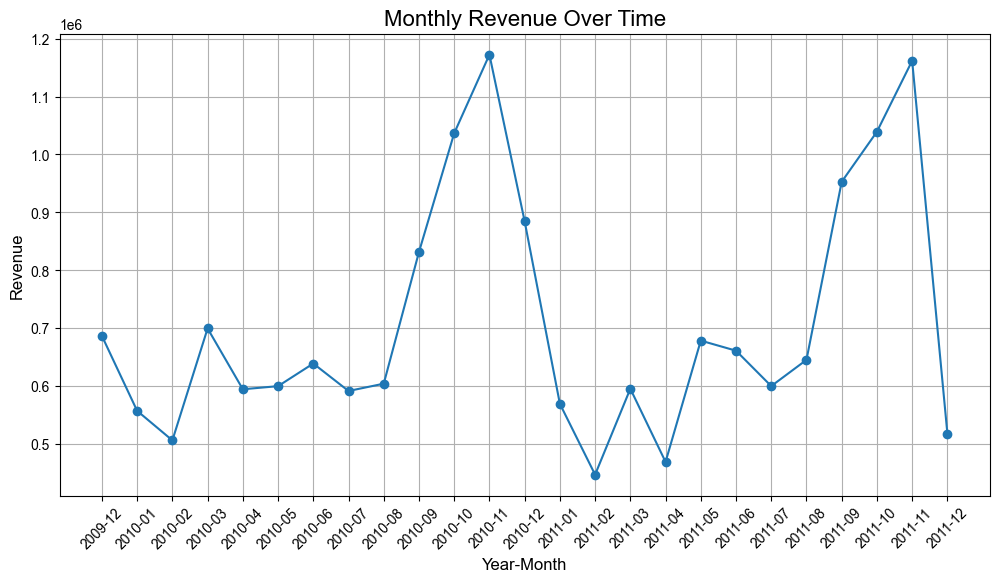

In [15]:

plt.figure(figsize=(12, 6)) # sets the canvas
# Sets figure size to 12 inches wide x 6 inches tall

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')

plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('ggplot') # this is also a style

plt.xticks(rotation=45)
# Rotates the x-axis labels (month names) 45 degrees for better readability

plt.title('Monthly Revenue Over Time', fontsize=16)

plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.grid(True)

os.makedirs("Graph_Plots", exist_ok=True)
# To avoid FileNotFoundError, create the folder first for below line

plt.savefig("Graph_Plots/monthly_revenue_plot.png", dpi=300)
# `dpi=300` ensures high resolution

plt.show()
# Always call `plt.show()` **after** `plt.savefig()` to avoid saving a blank image

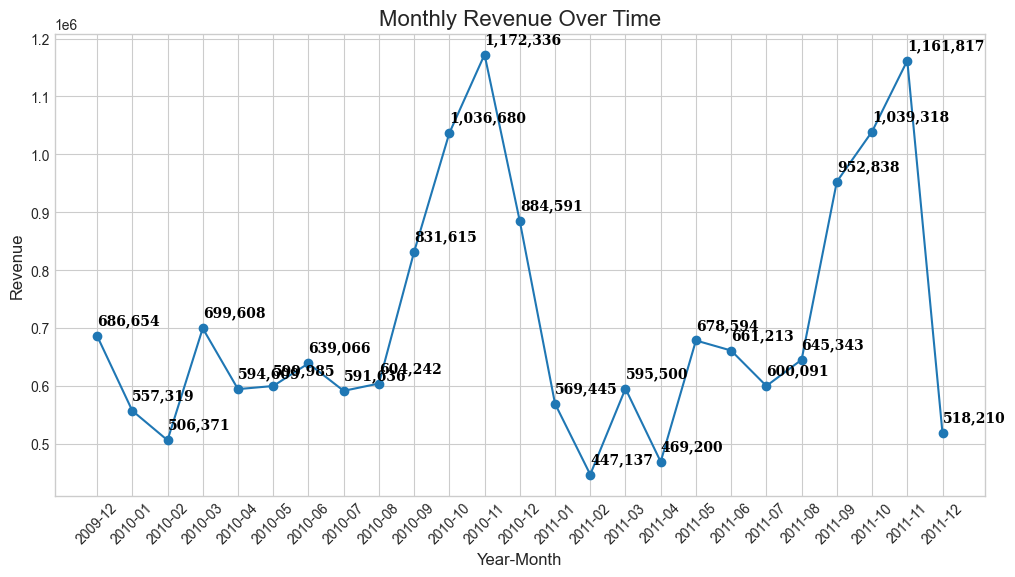

In [16]:
font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 10,
}

plt.figure(figsize=(12, 6)) # sets the canvas
# Sets figure size to 12 inches wide x 6 inches tall

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')

# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('ggplot') # this is also a style

plt.xticks(rotation=45)
# Rotates the x-axis labels (month names) 45 degrees for better readability

plt.title('Monthly Revenue Over Time', fontsize=16)

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value+20000, f"{int(value):,}", fontdict=font, ha='left')

plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.grid(True)

os.makedirs("Graph_Plots", exist_ok=True)
# To avoid FileNotFoundError, create the folder first for below line

# plt.savefig("Graph_Plots/monthly_revenue_plot.png", dpi=300)
# `dpi=300` ensures high resolution

plt.show()
# Always call `plt.show()` **after** `plt.savefig()` to avoid saving a blank image

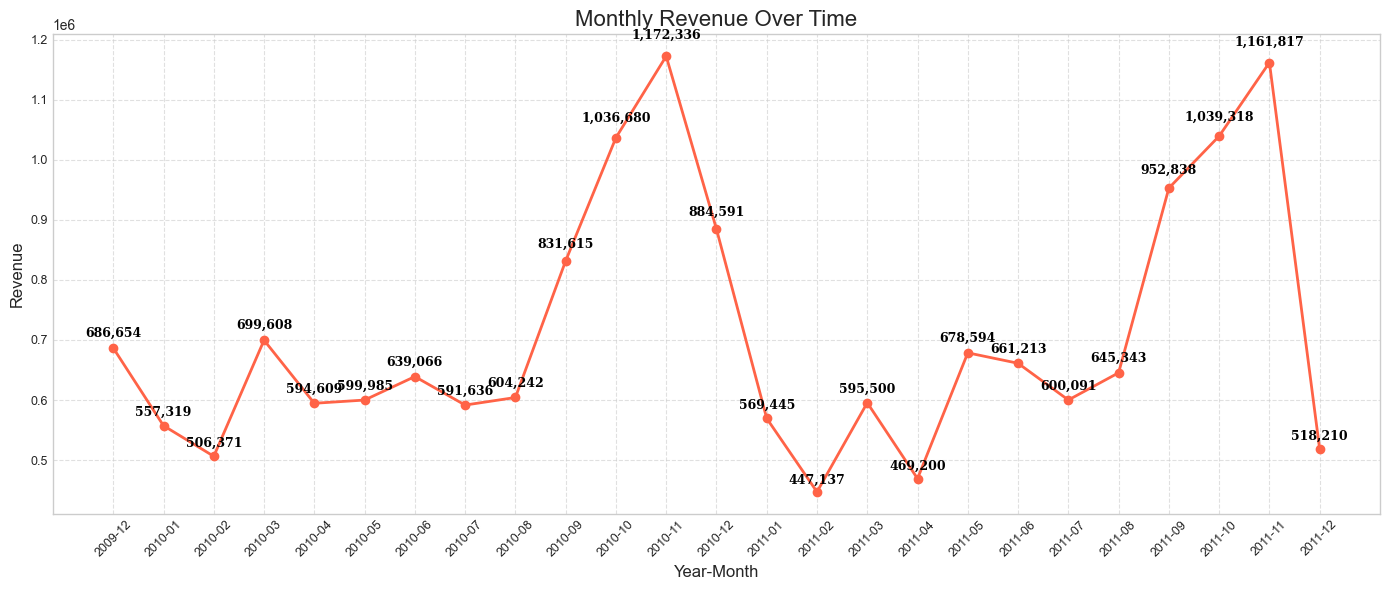

In [17]:

font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 9,
}

plt.style.use('seaborn-v0_8-whitegrid')  # Clean style
plt.figure(figsize=(14, 6))  # Wider canvas

# Plotting
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='tomato', linewidth=2)

# Add data labels
for i, value in enumerate(monthly_revenue.values):
    plt.text(
        monthly_revenue.index[i],
        value + (value * 0.02),  # dynamic spacing: 2% above value
        f"{int(value):,}",
        fontdict=font,
        ha='center',  # center alignment
        va='bottom',  # vertical align bottom
        rotation=0    # no rotation, can use 45 if still overlaps
    )

# Axis labels and title
plt.title('Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Ticks and grid
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure folder exists
os.makedirs("Graph_Plots", exist_ok=True)

# Save if needed
# plt.savefig("Graph_Plots/monthly_revenue_plot_fixed.png", dpi=300)

plt.tight_layout()
plt.show()


In [18]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
# df.groupby('Country') - Groups the data by each country.
# ['Revenue'].sum() - Calculates total revenue for each country.
# .sort_values(ascending=False) - Sorts the revenue in descending order (highest first).
country_revenue

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

# BAR PLOT

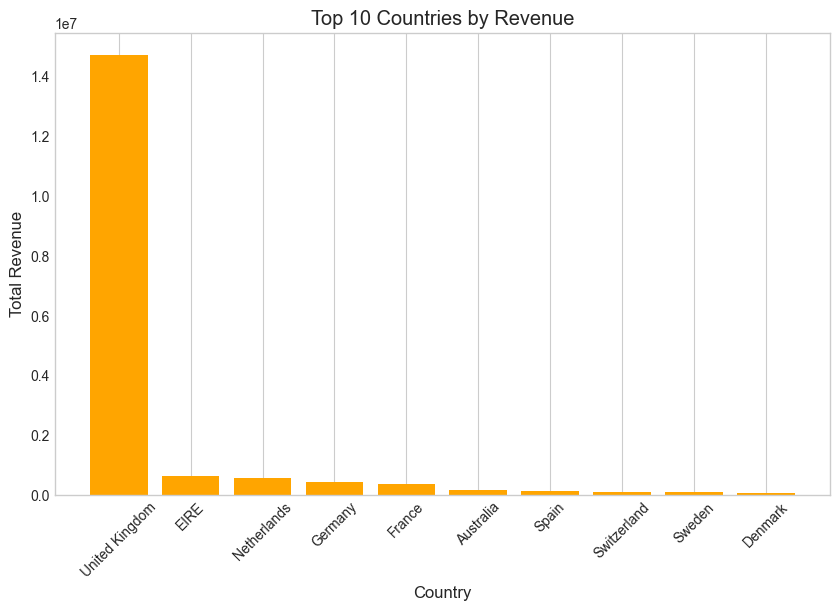

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(country_revenue.index, country_revenue.values, color='orange')

# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')
# we just want o show axis y grid
plt.show()

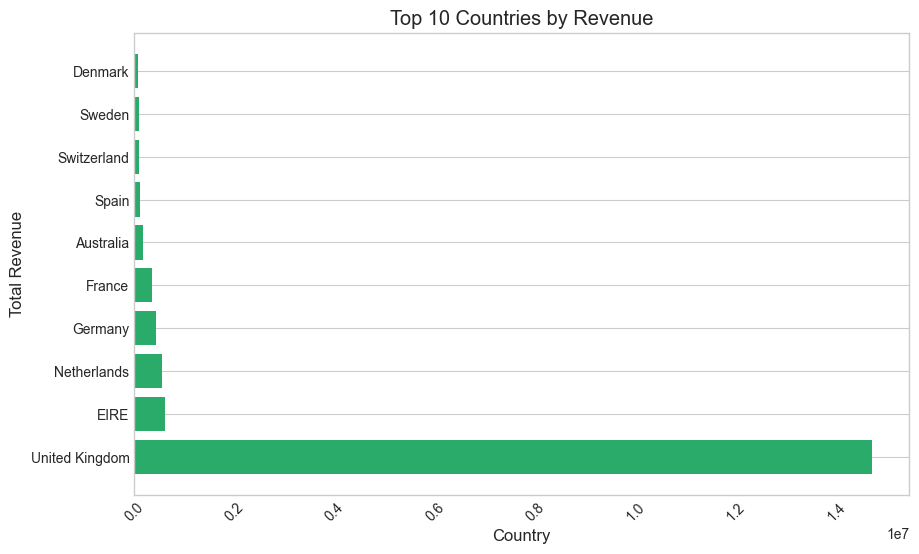

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(country_revenue.index, country_revenue.values, color='#2bab69')
# same as above just keeping the bar as horizontal
# color is HEX code - we can search for any color's HTML color code on google
# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.show()

### Random Seed:

In [21]:
import random
random.seed(123)
# Using the same seed (like 123) will always give the same sequence of random numbers.
# this is used when we want same sequence of randoms in diferent system
random_number = random.randint(1, 100) 
print(random_number)

7


In [22]:
random_number = random.randint(1, 100) 
print(random_number)

35


# Scatter Plot

In [23]:
sample_df = df.sample(100, random_state=1)
# Randomly selects 100 rows from the DataFrame df.
# random_state=1 :> Sets a fixed seed so that you get the same 100 rows every time you run it.
sample_df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
860936,566288,23236,STORAGE TIN VINTAGE DOILY,6,2011-09-11 15:18:00,2.89,12883.0,United Kingdom,17.34,2011-09
1009407,577516,51014L,"FEATHER PEN,LIGHT PINK",12,2011-11-20 13:08:00,0.39,16533.0,United Kingdom,4.68,2011-11
904439,569670,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-10-05 13:47:00,0.42,14730.0,United Kingdom,0.42,2011-10
298927,518505,37471,MULTICOLOUR DOTS PLATE,684,2010-08-09 13:10:00,0.10,14277.0,France,68.40,2010-08
245386,513123,22425,ENAMEL COLANDER CREAM,3,2010-06-22 10:24:00,4.95,12359.0,Cyprus,14.85,2010-06


In [24]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 860936 to 347550
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      100 non-null    object        
 1   StockCode    100 non-null    object        
 2   Description  100 non-null    object        
 3   Quantity     100 non-null    int64         
 4   InvoiceDate  100 non-null    datetime64[ns]
 5   Price        100 non-null    float64       
 6   Customer ID  100 non-null    float64       
 7   Country      100 non-null    object        
 8   Revenue      100 non-null    float64       
 9   Month        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.6+ KB


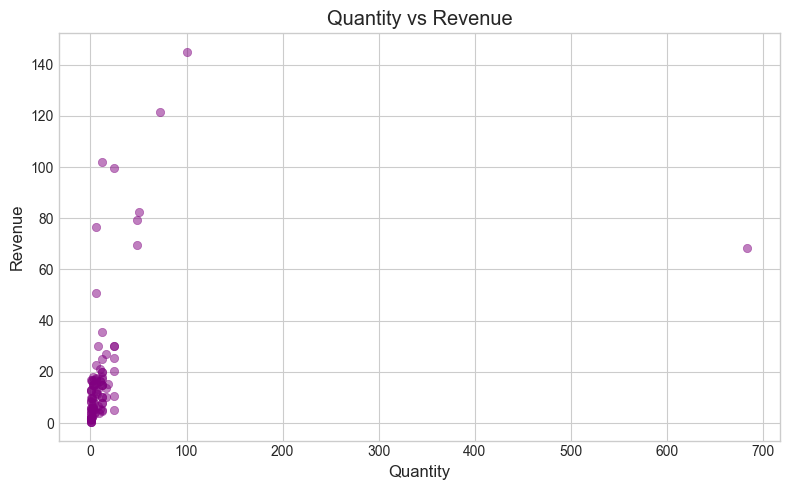

In [25]:
plt.figure(figsize=(8, 5))
# figure (plot canvas) with a size of 8 inches wide and 5 inches tall
plt.scatter(sample_df['Quantity'], sample_df['Revenue'], alpha=0.5, color='purple')
# alpha=0.5: Sets transparency to 50%, useful when points overlap.


plt.style.use('ggplot')
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# Sub-Plots
### Multiple charts in one figure

In [26]:
# P.S : Compare PLOT(1)monthly revenue by PLOT(2) monthly quantity

In [27]:
monthly_quantity = df.groupby('Month')['Quantity'].sum().sort_index()
monthly_quantity.head()

Month
2009-12    400153
2010-01    370921
2010-02    372761
2010-03    503466
2010-04    352025
Name: Quantity, dtype: int64

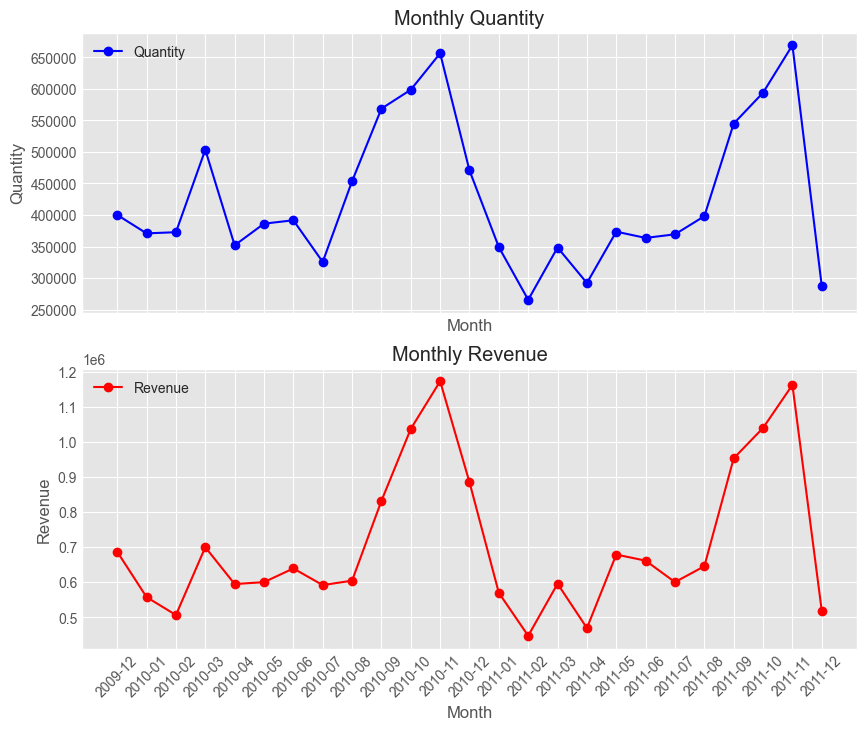

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
# nrows=2, ncols=1 means 2 rows and 1 column (one plot on top of the other).
# figsize=(10, 8) sets the size of the entire figure to 10 inches wide and 8 inches tall.
# sharex=True means both subplots share the same x-axis, 
# so the x-axis labels will be aligned and displayed only once (typically on the bottom plot).

axs[0].plot(monthly_quantity.index, monthly_quantity.values, marker='o', color='blue', label='Quantity')
axs[0].set_title("Monthly Quantity")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Quantity")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='red', label='Revenue')
axs[1].set_title("Monthly Revenue")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Revenue")
axs[1].grid(True)
axs[1].legend()

plt.xticks(rotation=45)
plt.show()

In [29]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


# Histogram

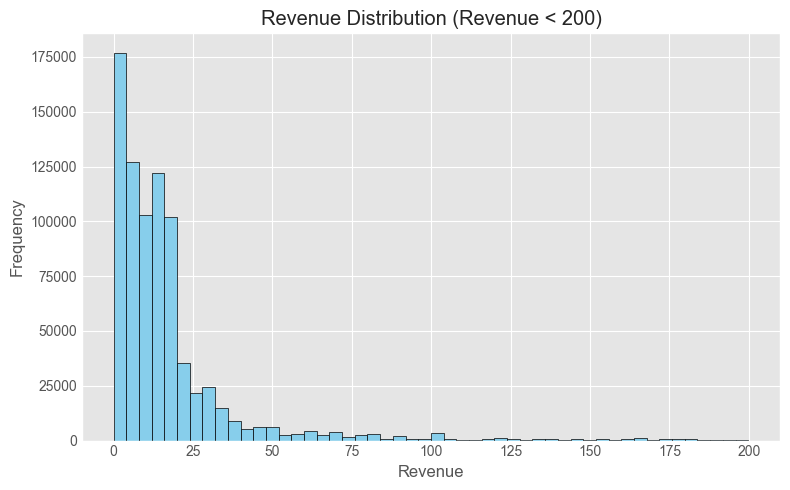

In [30]:
filtered_revenue = df[df['Revenue'] < 200]['Revenue'].copy()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(filtered_revenue, bins=50, color='skyblue', edgecolor='black')
# sns.histplot(filtered_revenue, bins=50, kde=True, color='skyblue', edgecolor='black') # for kde use seaborn
plt.title('Revenue Distribution (Revenue < 200)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
# It automatically adjusts spacing between plot elements 
# (like axes, labels, titles, legends, and subplots) so that nothing overlaps or gets cut off.
plt.show()

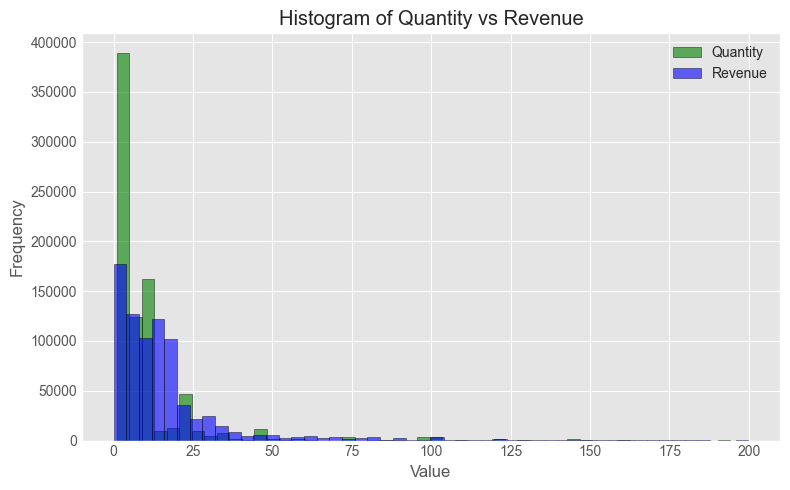

In [31]:
plt.figure(figsize=(8, 5))

filtered_revenue = df[df['Revenue'] < 200]['Revenue'].copy()
filtered_quantity = df[df['Quantity'] < 200]['Quantity'].copy()

plt.hist(filtered_quantity, bins=50, alpha=0.6, label='Quantity', color='green', edgecolor='black')
plt.hist(filtered_revenue, bins=50, alpha=0.6, label='Revenue', color='blue', edgecolor='black')

plt.title('Histogram of Quantity vs Revenue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot

Why Use Box Plots?

To detect outliers

See if the distribution is symmetric or skewed

Compare spread across multiple categories (e.g., Revenue by Country)

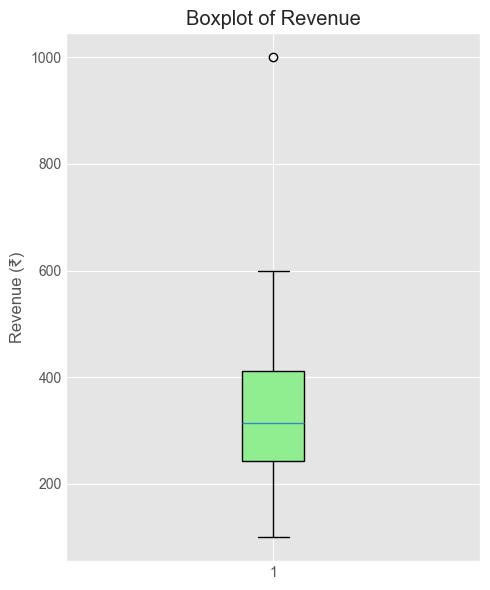

In [32]:
# a dataset of monthly revenues from an e-commerce store, and you want to visualize 
# how spread out the revenues are, and whether there are any outliers.

revenue = [100, 150, 200, 220, 250, 270, 300, 310, 320, 350, 360, 400, 450, 500, 600, 1000]

plt.figure(figsize=(5, 6))
plt.boxplot(revenue, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.title('Boxplot of Revenue')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\nikunj.dhaka\AppData\Local\Temp\ipykernel_8740\3410716072.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True,


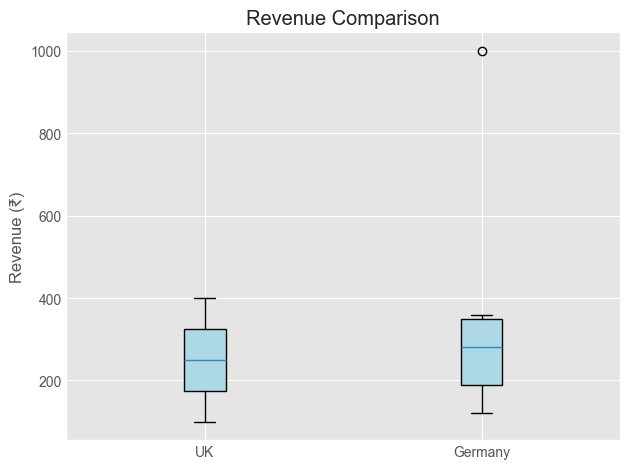

In [33]:
data = [ 
    [100, 150, 200, 250, 300, 350, 400],  # Group 1: UK
    [120, 160, 220, 280, 340, 360, 1000]  # Group 2: Germany
]

plt.boxplot(data, patch_artist=True,
            labels=["UK", "Germany"],
            boxprops=dict(facecolor='lightblue'))

# By default, boxplots are not filled with color. 
# Setting patch_artist=True allows you to add color to the boxes.
# boxprops is used to customize the appearance
# The dict passed to boxprops specifies the color of the box.
# facecolor='lightblue' sets the fill color of the boxes
# customize other properties here as well, such as edgecolor for the border, linewidth for the thickness, etc.

plt.title('Revenue Comparison')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

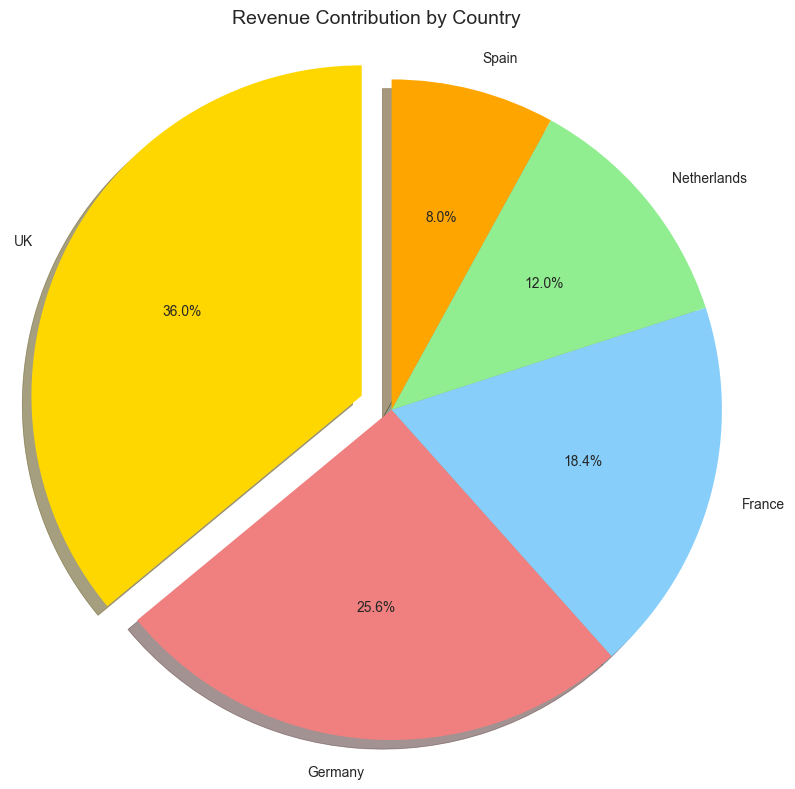

In [38]:
# Example data (replace with your own or use df.groupby(...).sum().head())
labels = ['UK', 'Germany', 'France', 'Netherlands', 'Spain']
revenues = [450000, 320000, 230000, 150000, 100000]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Create pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(revenues,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',   # Show percentage with 1 decimal place
        startangle=90,      # Rotate start angle
        shadow=True,         # Add a shadow for 3D effect
        explode=(0.1, 0, 0, 0, 0))  # 'explode' the first slice (UK)

plt.title('Revenue Contribution by Country', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()